In [210]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

[*********************100%***********************]  2 of 2 completed
/var/folders/bd/wgxbz_ln2y3bwpm6b71syl_00000gn/T/ipykernel_11170/2529952770.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = stock_data['Close'].pct_change().dropna()


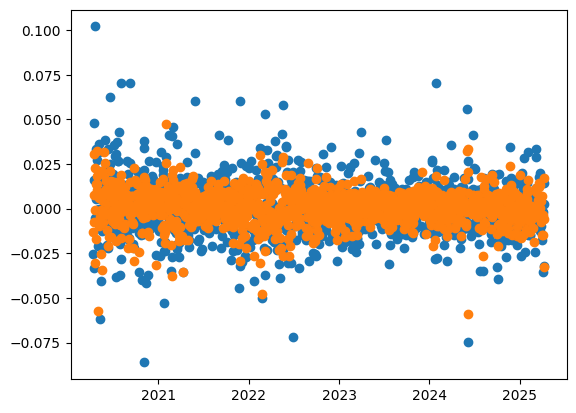

In [211]:
#Getting stock data and organizing it
stock_data = yf.download(['RELIANCE.NS', '^NSEI'], period='5y', interval='1d')
returns = stock_data['Close'].pct_change().dropna()
returns.columns = ['Stock', 'Market']

#daily returns scattered with blue being the stock and orange being the market
plt.scatter(returns.index, returns['Stock'])
plt.scatter(returns.index, returns['Market'])

In [212]:
#The risk free rate of return used to calculate the excess returns of the stock and the market
rf_daily = 0.07365/252
returns['Excess_Stock'] = returns['Stock'] - rf_daily
returns['Excess_Market'] = returns['Market'] - rf_daily

#Reshaping to use values later
X = returns['Excess_Market'].values.reshape(-1, 1)
y = returns['Excess_Stock'].values.reshape(-1, 1)

#Running the regression model to calculate beta
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [213]:
#Evaluating the model
print(f"R-squared: {model.score(X, y)}")
print(f"Coefficients: {model.coef_}")
print(f"Intercept: {model.intercept_}")

R-squared: 0.40202341318536716
Coefficients: [[1.05030157]]
Intercept: [-5.42307624e-05]


In [214]:
#Variables needed for CAPM
risk_free_rate = 0.07365
beta = model.coef_
expected_market_return = np.mean(X) * 252

#Applying CAPM to find the annual expected return of the stock
expected_return = risk_free_rate + beta * (expected_market_return - risk_free_rate)
print(f"Expected Annual Stock Return: {expected_return}")
print(f"Expected Annual Market Return: {expected_market_return}")
print(f"Beta: {beta}")

Expected Annual Stock Return: [[0.12362042]]
Expected Annual Market Return: 0.1212272107291256
Beta: [[1.05030157]]
